In [25]:
import nltk
import os
import sys
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

In [26]:
# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.path.abspath(''), '..'))
sys.path.append(parent_dir)

In [27]:
from src.utils import pd_series_to_wordcloud, get_most_common_words

### Load data

In [28]:
path_to_data = "../data/interim/interim_data_v0.1.csv"
df = pd.read_csv(path_to_data, encoding="utf-8")

### EDA

In [29]:
df.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was customer s...,5
4,"I repeat my order 3 times in the drive thru, a...",1


In [30]:
reviews_num = df.shape[0]
print(f"Number of reviews: {reviews_num}")

Number of reviews: 33385


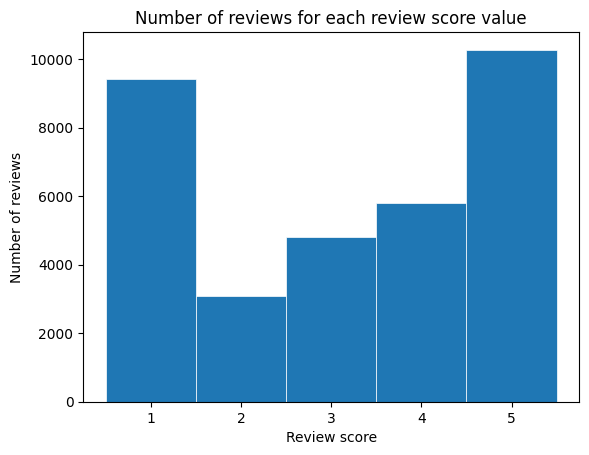

In [31]:
# Plot amount of comments for each score value
fig, ax = plt.subplots()
ax.hist(df['rating'], bins=[1,2,3,4,5,6], linewidth=0.5, edgecolor="white", align="left")
plt.title("Number of reviews for each review score value")
plt.xlabel("Review score")
plt.ylabel("Number of reviews")
plt.show()

In [32]:
nltk.download('stopwords', quiet=True)

True

In [33]:
# Create stopword list
stopwords = nltk.corpus.stopwords.words('english')

In [34]:
type(stopwords)

list

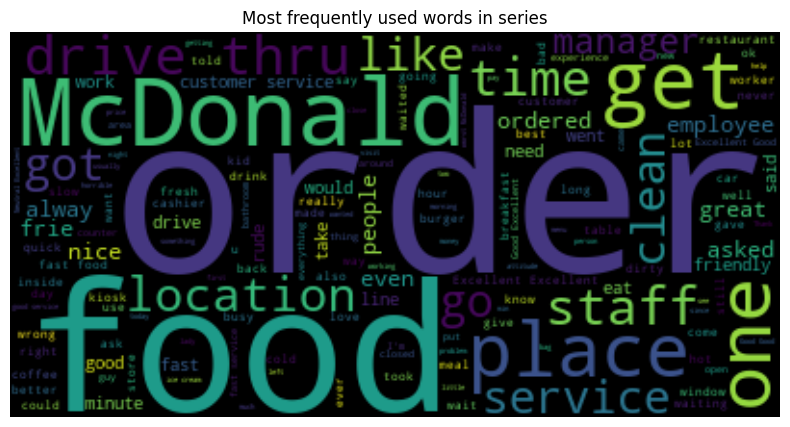

In [35]:
pd_series_to_wordcloud(df['review'], stopwords)

In [36]:
# # Remove reviews with rating '3' as neutrals, because we classify only positive/negative
# df = df[df['rating'] != 3]

In [37]:
# Classify scores as positive (1) and negative (-1)
df['sentiment'] = df['rating'].apply(lambda rating : 1 if rating > 3 else -1 if rating < 3 else 0)

In [38]:
df.head()

,review,rating,sentiment
0,Why does it look like someone spit on my food?...,1,-1
1,It'd McDonalds. It is what it is as far as the...,4,1
2,Made a mobile order got to the speaker and che...,1,-1
3,My mc. Crispy chicken sandwich was customer s...,5,1
4,"I repeat my order 3 times in the drive thru, a...",1,-1


In [39]:
# Split reviews into positive and negative sentiment
df_pos = df[df['sentiment'] == 1]
df_neu = df[df['sentiment'] == 0]
df_neg = df[df['sentiment'] == -1]

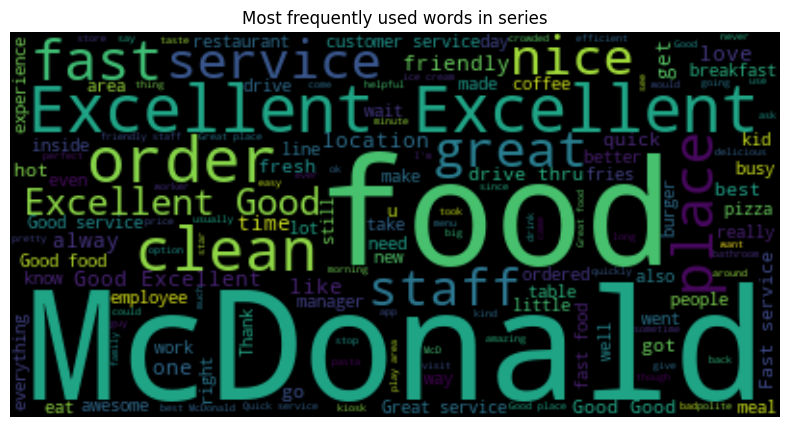

In [40]:
# Create wordcloud to see the most frequently used words in the positive reviews
pd_series_to_wordcloud(df_pos['review'], stopwords)

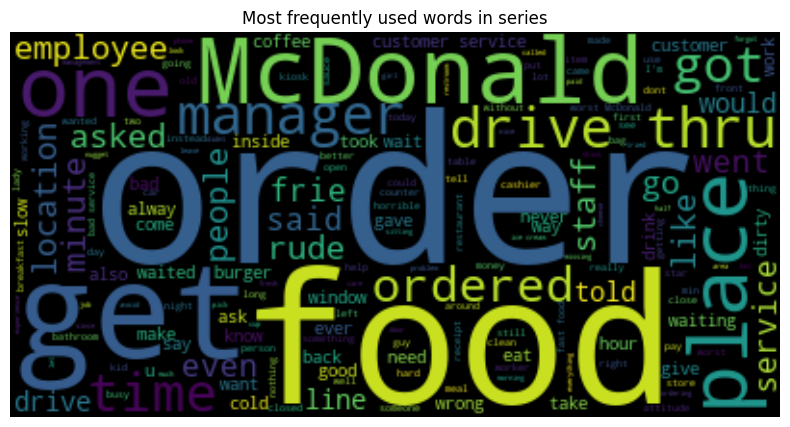

In [41]:
# Create wordcloud to see the most frequently used words in the negative reviews
pd_series_to_wordcloud(df_neg['review'], stopwords)

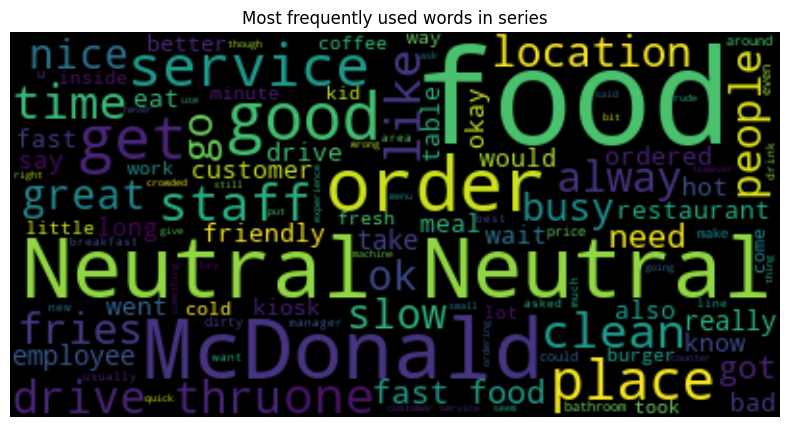

In [42]:
# Create wordcloud to see the most frequently used words in the neutral reviews
pd_series_to_wordcloud(df_neu['review'], stopwords)

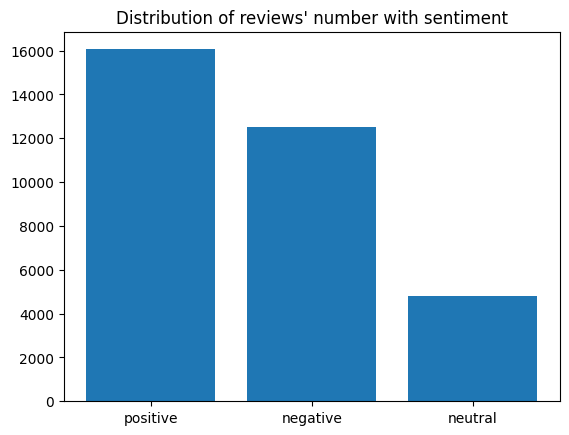

In [43]:
# Plot distribution of reviews with sentiment
fig, ax = plt.subplots()
counts = df['sentiment'].value_counts()
plt.bar(['positive', 'negative', 'neutral'], [count for count in counts])
plt.title("Distribution of reviews' number with sentiment")
plt.show()

In [44]:
punkt_symbols = ["?", ".", ";", ":",  "!",'"', ",", '\'']

In [45]:
# Find most common words in comments
exception_words = stopwords + punkt_symbols
pos_common_words = get_most_common_words(df_pos['review'], 10, exception_words)
neu_common_words = get_most_common_words(df_neu['review'], 10, exception_words)
neg_common_words = get_most_common_words(df_neg['review'], 10, exception_words)

In [46]:
# Find most common words in all sentiment groups of comments
common_words_intersect = list(set(pos_common_words).intersection(set(neg_common_words)).intersection(set(neu_common_words)))
print(common_words_intersect)

['service', 'order', 'food', 'mcdonalds']
